# Using Periodograms to Model Stellar Rotation

### Import `lightkurve`, `astropy`, and retrieve relevant data

In [113]:
import lightkurve as lk
import numpy as np
from matplotlib import pyplot as plt
import astropy as ap
import astropy.units as u

# Find and download all data for KIC 2157356 from Kepler
data = lk.search_lightcurve("KIC 2157356", author="Kepler").download_all()

### Clean Data: Detrend, Normalize, and remove NaNs

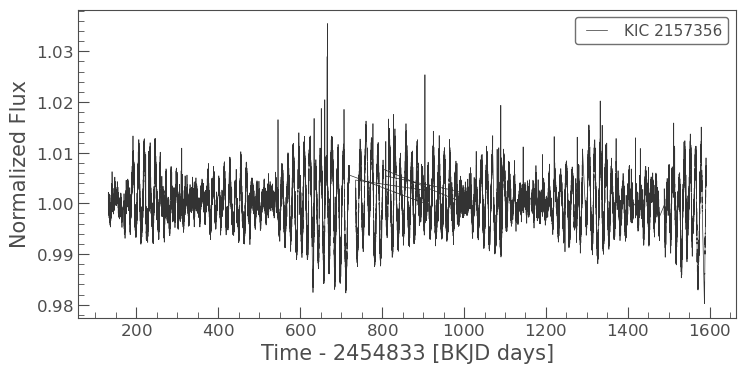

In [ ]:
# Normalize and remove outliers from each lightcurve individually before appending
for index, light_curves in enumerate(data):
    # It may take some trial and error to find the right window size
    data[index] = data[index].normalize()
    data[index] = data[index].remove_outliers()

# Stitch and plot the lightcurves. We can see a huge variance in the lightcurves, +/- 0.2!
lc = data.stitch()
lc.plot()
plt.show()

### Use a periodogram to find the highest power peak

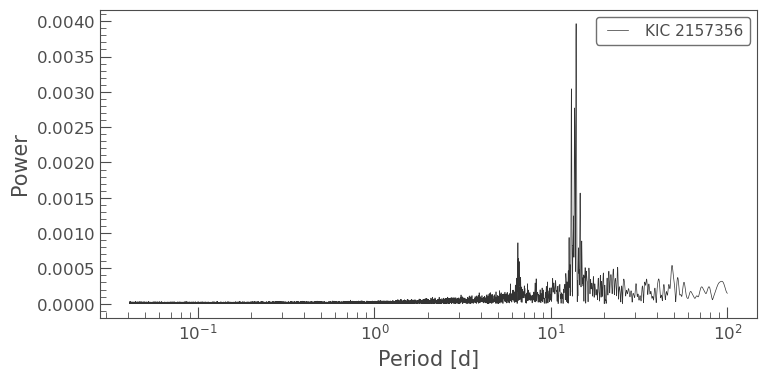

In [ ]:
periodogram = lc.to_periodogram(oversample_factor=100, maximum_period=100)
periodogram.plot(view='period')
plt.xscale('log')
plt.show()

# We can see a pretty clear spike!

### Generate the periodogram model

Max period: 13.896599694142502 d


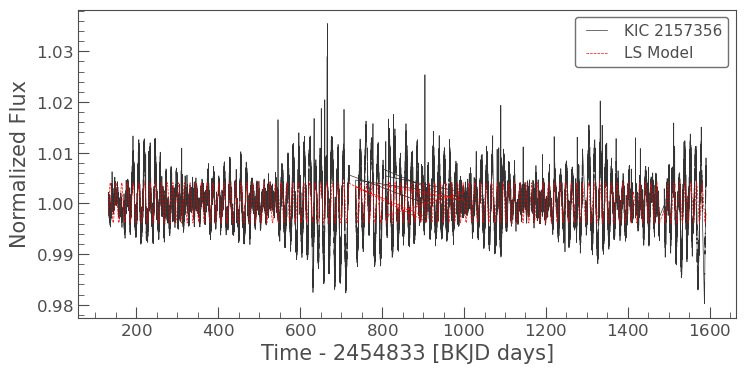

In [124]:
# Find that spike in period
max_period = periodogram.period_at_max_power
print(f"Max period: {max_period}")
# Create a model of the lightcurve using the frequency at the max power
lc_model = periodogram.model(time=lc.time, frequency=periodogram.frequency_at_max_power)
# Plot the model over the lightcurve

ax = lc.plot()
lc_model.plot(ax=ax, ls='--', c='red')

plt.show()
# This model fits the lightcurve pretty well! 
# Can you remove the signal from the lightcurve, and reveal any other signals?